## Пример 2

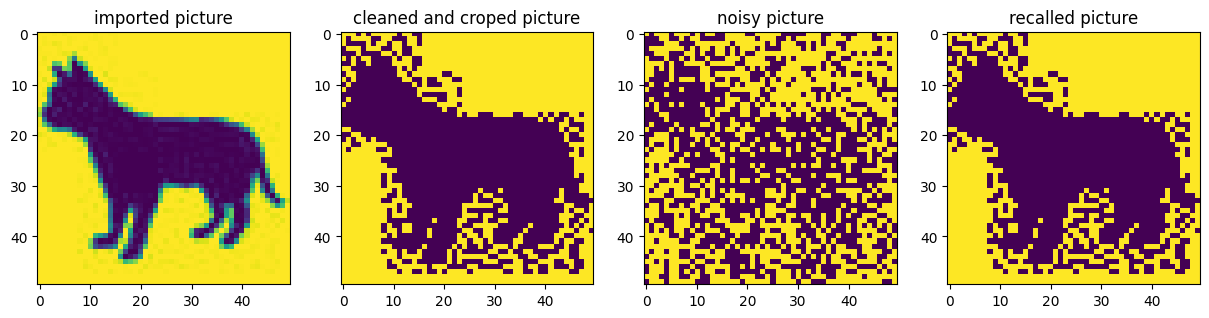

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img
import time
start_time = time.time()


def trainer(vector):
    vector = vector.flatten()
    coefMat = np.outer(vector, vector)
    np.fill_diagonal(coefMat, 0)
    return coefMat


def prediction(corruptedVec, coefMat):
    corruptedVec = corruptedVec.flatten()
    y = np.dot(coefMat, corruptedVec.T)
    predictVec = np.where(y > 0, 1, -1)
    return predictVec.reshape([int(np.sqrt(len(predictVec))), int(np.sqrt(len(predictVec)))])


def imageGenerator(imageVector, vmax=1):
    # Создание чистого изображения
    cleanImage = np.where(imageVector == vmax)
    # Создание зашумленного изображения
    noisyImage = cleanImage + np.random.normal(0, 2, imageVector.shape)
    # Бинаризация зашумленного изображения
    noisyImage = np.where(noisyImage >= 0, 1, -1)
    return cleanImage, noisyImage

#Import the image
image = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()